<a href="https://colab.research.google.com/github/jocinenabwire/Autolib-Car-Sharing-Hypothesis-Testing/blob/main/Jocine_Nabwire_Moringa_School_Week_4_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOLIB ELECTRIC CAR SHARING COMPANY**

## **1. Defining the Question**

### a) Specifying the Question


> **The Null Hypothesis:** There is no difference in the number of Bluecars taken in weekends in January in postal code 75001 and postal code 75002.

> **The Alternative Hypothesis:** There is a difference in the number of Bluecars taken in weekends in January in postal code 75001 and postal code 75002.

### b) Defining the Metric for Success

> Find out whether to reject or fail to reject the null hypothesis.

### c) Understanding the context 

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

### d) Recording the Experimental Design

> The following steps were taken:

1. Business Understanding
2. Reading the data
3. Checking our data
4. Data cleaning
5. Implementing the solution
6. Challenging the solution

### e) Data Relevance

Datasets Provided

1. Dataset [Link](http://bit.ly/DSCoreAutolibDataset)

2. Glossary [Link](http://bit.ly/DSCoreAutolibDatasetGlossary)


## **2. Reading the Data**

### Importing Libraries

In [133]:
# Importing the libraries we will need 

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats

from scipy import stats

from scipy.stats import norm

from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading the Dataset from our CSV file

In [2]:
#loading the Autolib Dataset
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
#Previewing the Autolib dataset
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [3]:
#checking the tail
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


## **3. Data Understanding**

In [4]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


The dataset has 16085 entries and 13 columns.

The dataset consists of object and integer datatypes. 

In [5]:
#checking the columns
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

These are columns found in the dataset.

In [6]:
#Getting the shape
df.shape

(16085, 13)

The dataset has 16085 entries and 13 columns.

The dataset has 16085 rows and 13 columns.

In [7]:
#getting basic statistical details
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


The count,mean,std,min,max and quartiles are shown above.

In [8]:
#getting unique values
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

These shows the number of unique values in each column.

## **4. Data Cleaning**

> This done by following the data integrity rules i.e Validity, Accuracy, Completeness, Consistency, Uniformity to ensure the data is ready for analysis

### Completeness

In [9]:
#checking for null values across each column
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

No null values available.

### Validity

In [9]:
#no procedures were done

### Consistency

In [10]:
df.duplicated().sum()

0

There are no duplicates.

### Uniformity

In [11]:
#converting date to datetime data type
#importing datetime module
from datetime import datetime
#converting
df['date']=pd.to_datetime(df['date'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

Date has been converted to datetime data type.

## **5.Tidying the Dataset**

In [12]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

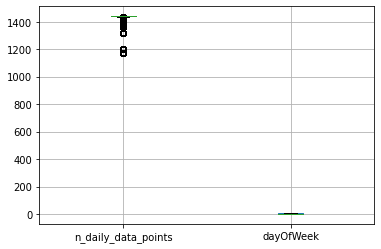

In [13]:
# Checking for Outliers
boxplot1=df.boxplot(column=['n_daily_data_points','dayOfWeek'])

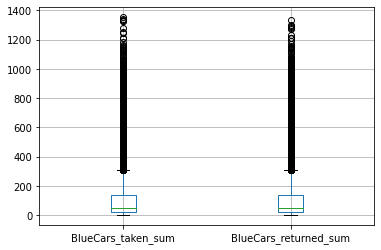

In [14]:
boxplot2=df.boxplot(column=['BlueCars_taken_sum','BlueCars_returned_sum'])

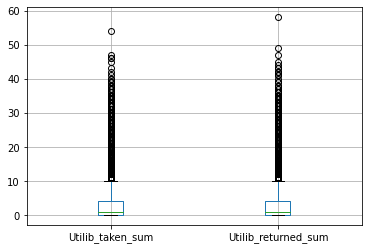

In [15]:
boxplot3=df.boxplot(column=['Utilib_taken_sum','Utilib_returned_sum'])

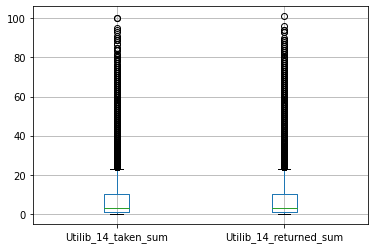

In [16]:
boxplot4=df.boxplot(column=['Utilib_14_taken_sum', 'Utilib_14_returned_sum'])

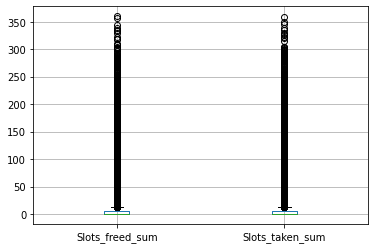

In [17]:
boxplot5=df.boxplot(column=['Slots_freed_sum', 'Slots_taken_sum'])

We will not drop the outliers since this is real time data.

## **6. Exploratory Data Analysis**

### Univariate Analysis

#### Measures of Central Tendency

In [18]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

Mean

In [19]:
df['BlueCars_taken_sum'].mean()

125.92695057506994

In [20]:
df['BlueCars_returned_sum'].mean()

125.912713708424

In [21]:
df['Utilib_taken_sum'].mean()

3.69829033260802

In [22]:
df['Utilib_returned_sum'].mean()

3.6990985390115014

In [23]:
df['Utilib_14_taken_sum'].mean()

8.600559527510102

In [24]:
df['Utilib_14_returned_sum'].mean()

8.599191793596518

In [25]:
df['Slots_freed_sum'].mean()

22.62903326080199

In [26]:
df['Slots_taken_sum'].mean()

22.629281939695367

In [27]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

Median

In [28]:
df['BlueCars_taken_sum'].median()

46.0

In [29]:
df['BlueCars_returned_sum'].median()

46.0

In [30]:
df['Utilib_taken_sum'].median()

1.0

In [31]:
df['Utilib_returned_sum'].median()

1.0

In [32]:
df['Utilib_14_taken_sum'].median()

3.0

In [33]:
df['Utilib_14_returned_sum'].median()

3.0

In [34]:
df['Slots_freed_sum'].median()

0.0

In [35]:
df['Slots_taken_sum'].median()

0.0

Mode

In [36]:
df['BlueCars_taken_sum'].mode()

0    12
dtype: int64

In [37]:
df['BlueCars_returned_sum'].mode()

0    13
dtype: int64

In [38]:
df['Utilib_taken_sum'].mode()

0    0
dtype: int64

In [39]:
df['Utilib_returned_sum'].mode()

0    0
dtype: int64

In [40]:
df['Utilib_14_taken_sum'].mode()

0    0
dtype: int64

In [41]:
df['Utilib_14_returned_sum'].mode()

0    0
dtype: int64

In [42]:
df['Slots_freed_sum'].mode()

0    0
dtype: int64

In [43]:
df['Slots_taken_sum'].mode()

0    0
dtype: int64

#### Measures of Dispersion/Variability

Standard Deviation

In [44]:
df['BlueCars_taken_sum'].std()

185.42657876727893

In [45]:
df['BlueCars_returned_sum'].std()

185.50153480148427

In [46]:
df['Utilib_taken_sum'].std()

5.815057779367249

In [47]:
df['Utilib_returned_sum'].std()

5.824634228651658

In [48]:
df['Utilib_14_taken_sum'].std()

12.870098297095637

In [49]:
df['Utilib_14_returned_sum'].std()

12.868992936610336

In [50]:
df['Slots_freed_sum'].std()

52.12026333757879

In [51]:
df['Slots_taken_sum'].std()

52.146029870452566

Variance

In [52]:
df['BlueCars_taken_sum'].var()

34383.01611333789

In [53]:
df['BlueCars_returned_sum'].var()

34410.819413706275

In [54]:
df['Utilib_taken_sum'].var()

33.81489697737956

In [55]:
df['Utilib_returned_sum'].var()

33.9263638975805

In [56]:
df['Utilib_14_taken_sum'].var()

165.63943017690403

In [57]:
df['Utilib_14_returned_sum'].var()

165.61097920252672

In [58]:
df['Slots_freed_sum'].var()

2716.52185037856

In [59]:
df['Slots_taken_sum'].var()

2719.2084312501315

Range

In [60]:
maxbt=df['BlueCars_taken_sum'].max()
minbt=df['BlueCars_taken_sum'].min()
print(maxbt-minbt)

1352


Quartiles

In [61]:
df['BlueCars_taken_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_taken_sum, dtype: float64

In [62]:
df['BlueCars_returned_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64

In [63]:
df['Utilib_returned_sum'].quantile([0.25,0.5,0.75])

0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_returned_sum, dtype: float64

In [64]:
df['Utilib_taken_sum'].quantile([0.25,0.5,0.75])

0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_taken_sum, dtype: float64

In [65]:
df['Utilib_14_returned_sum'].quantile([0.25,0.5,0.75])

0.25     1.0
0.50     3.0
0.75    10.0
Name: Utilib_14_returned_sum, dtype: float64

In [66]:
df['Utilib_14_taken_sum'].quantile([0.25,0.5,0.75])

0.25     1.0
0.50     3.0
0.75    10.0
Name: Utilib_14_taken_sum, dtype: float64

In [67]:
df['Slots_freed_sum'].quantile([0.25,0.5,0.75])

0.25    0.0
0.50    0.0
0.75    5.0
Name: Slots_freed_sum, dtype: float64

In [68]:
df['Slots_taken_sum'].quantile([0.25,0.5,0.75])

0.25    0.0
0.50    0.0
0.75    5.0
Name: Slots_taken_sum, dtype: float64

In [69]:
df['n_daily_data_points'].quantile([0.25,0.5,0.75])

0.25    1439.0
0.50    1440.0
0.75    1440.0
Name: n_daily_data_points, dtype: float64

Skewness

In [70]:
df['BlueCars_returned_sum'].skew()

2.412084978838923

In [71]:
df['BlueCars_taken_sum'].skew()

2.4063548974959086

In [72]:
df['Utilib_returned_sum'].skew()

2.57866477971619

In [73]:
df['Utilib_taken_sum'].skew()

2.5568719194754777

In [74]:
df['Utilib_14_returned_sum'].skew()

2.511487901149739

In [75]:
df['Utilib_14_taken_sum'].skew()

2.5109244534822923

In [76]:
df['Slots_freed_sum'].skew()

2.5974057870090994

In [77]:
df['Slots_taken_sum'].skew()

2.5969043474634987

In [78]:
df['n_daily_data_points'].skew()

-5.742776211517434

Kurtosis

In [79]:
df['BlueCars_returned_sum'].kurt()

6.1862880957582345

In [80]:
df['BlueCars_taken_sum'].kurt()

6.172692305510042

In [81]:
df['Utilib_returned_sum'].kurt()

7.93635700780893

In [82]:
df['Utilib_taken_sum'].kurt()

7.702361895243428

In [83]:
df['Utilib_14_returned_sum'].kurt()

7.18546312191963

In [84]:
df['Utilib_14_taken_sum'].kurt()

7.18681525579947

In [85]:
df['Slots_freed_sum'].kurt()

6.454514382612528

In [86]:
df['Slots_taken_sum'].kurt()

6.442553073772169

In [87]:
df['n_daily_data_points'].kurt()

36.59484575836295

#### Frequency Tables

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [89]:
df.day_type.value_counts()

weekday    11544
weekend     4541
Name: day_type, dtype: int64

#### Histograms

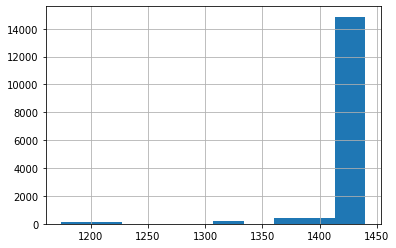

In [90]:
df['n_daily_data_points'].hist()

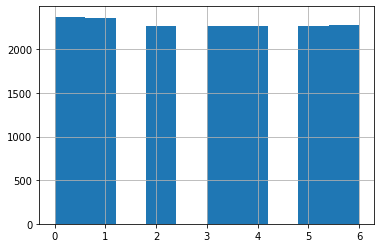

In [91]:
df['dayOfWeek'].hist()

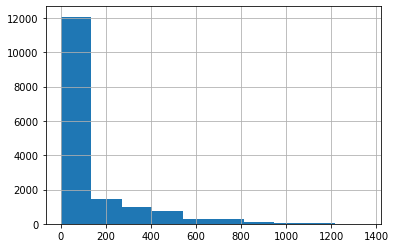

In [92]:
df['BlueCars_taken_sum'].hist()

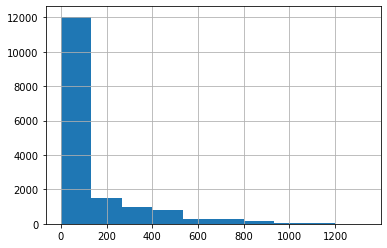

In [93]:
df['BlueCars_returned_sum'].hist()

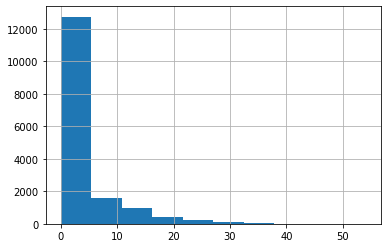

In [94]:
df['Utilib_taken_sum'].hist()

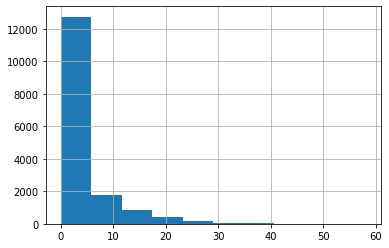

In [95]:
df['Utilib_returned_sum'].hist()

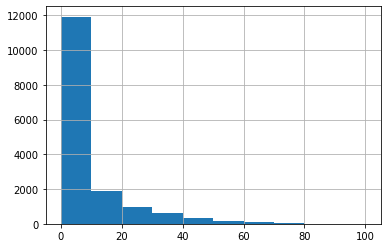

In [96]:
df['Utilib_14_taken_sum'].hist()

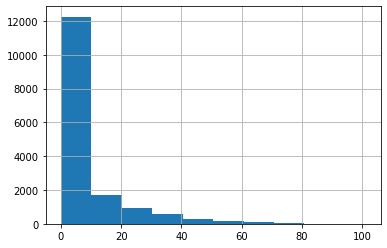

In [97]:
df['Utilib_14_returned_sum'].hist()

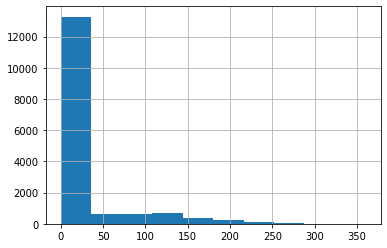

In [98]:
df['Slots_freed_sum'].hist()

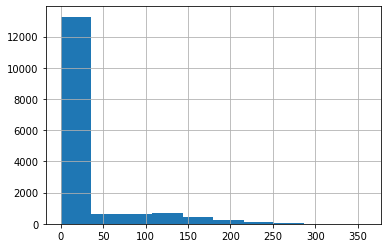

In [99]:
df['Slots_taken_sum'].hist()

#### Pie Chart

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

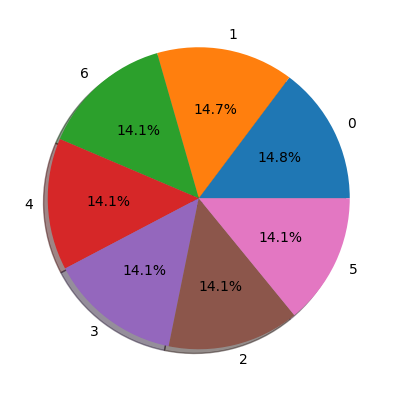

In [101]:
day_of_week=df['dayOfWeek'].value_counts()
labels=day_of_week.index
values=day_of_week.values

plt.figure(figsize=(5,5),dpi=100)
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

All days of the week had equal representation.

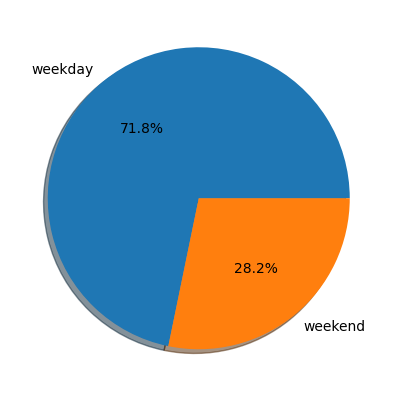

In [102]:
day_type=df['day_type'].value_counts()
labels=day_type.index
values=day_type.values

plt.figure(figsize=(5,5),dpi=100)
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True)
plt.show()

Weekdays were more compared to weekends.

### Bivariate Analysis

#### Bar Charts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


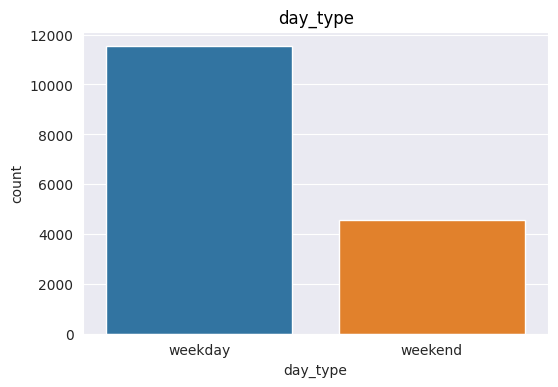

In [103]:
plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.day_type)
plt.title('day_type', color = 'black')
plt.show()

#### Line Charts

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

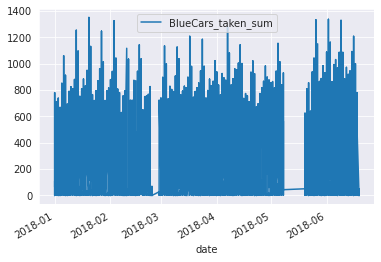

In [105]:
df.plot(x ='date', y='BlueCars_taken_sum', kind = 'line')

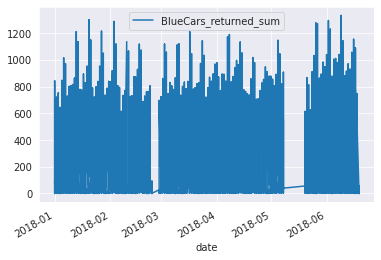

In [106]:
df.plot(x ='date', y='BlueCars_returned_sum', kind = 'line')

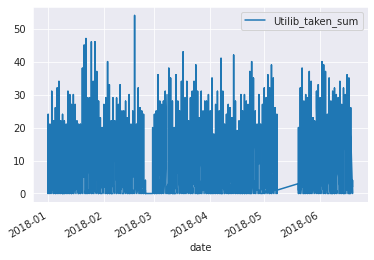

In [107]:
df.plot(x ='date', y='Utilib_taken_sum', kind = 'line')

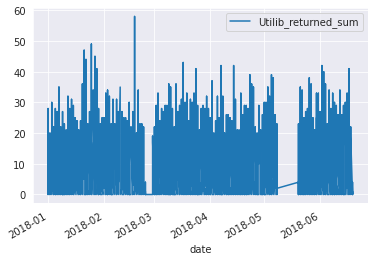

In [108]:
df.plot(x ='date', y='Utilib_returned_sum', kind = 'line')

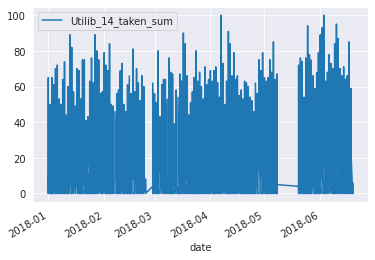

In [109]:
df.plot(x ='date', y='Utilib_14_taken_sum', kind = 'line')

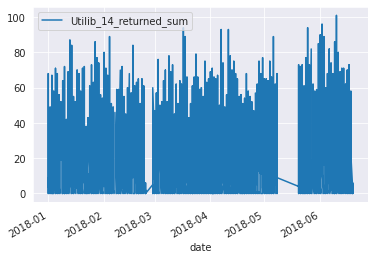

In [110]:
df.plot(x ='date', y='Utilib_14_returned_sum', kind = 'line')

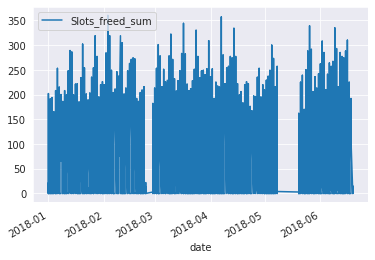

In [111]:
df.plot(x ='date', y='Slots_freed_sum', kind = 'line')

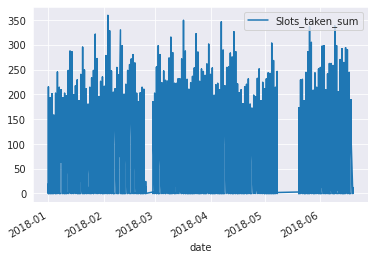

In [112]:
df.plot(x ='date', y='Slots_taken_sum', kind = 'line')

#### Heat Map

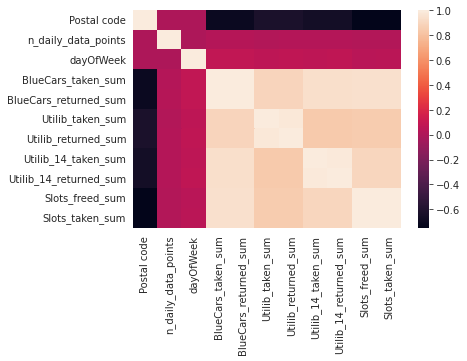

In [113]:
sns.heatmap(df.corr(),annot=False)
plt.show()

#### Scatter Plots

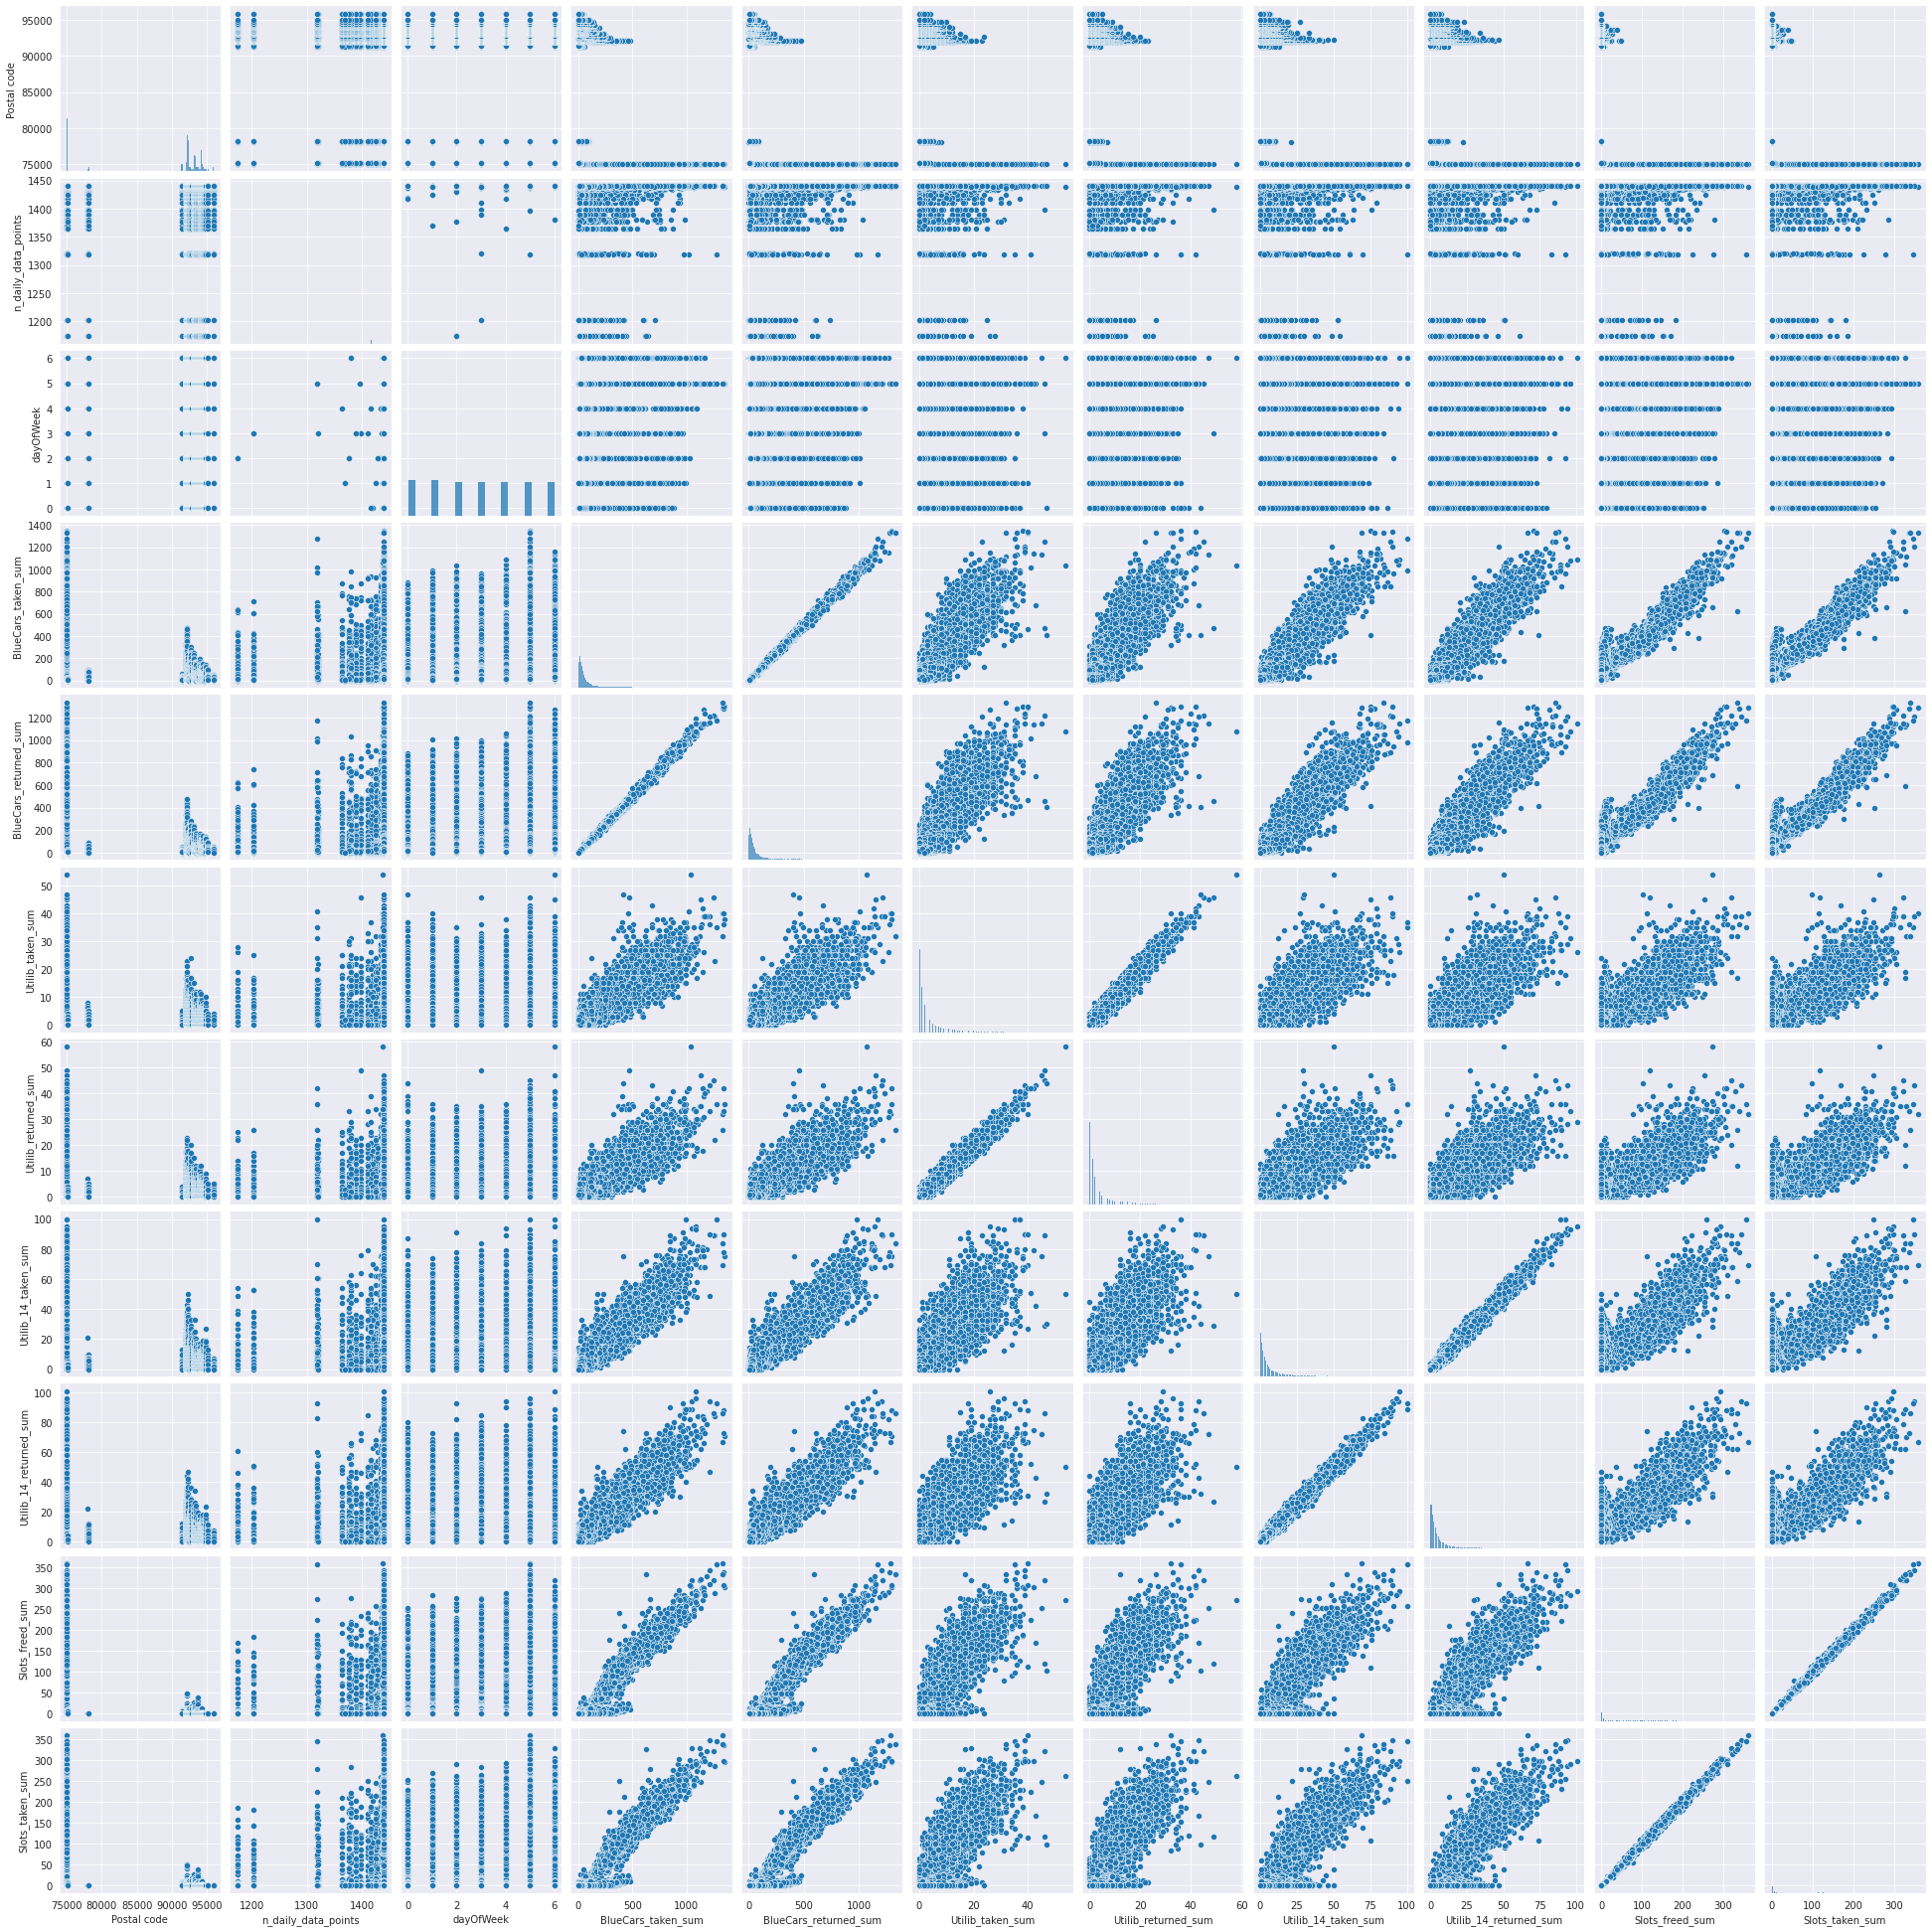

In [114]:
sns.pairplot(df)
plt.show()

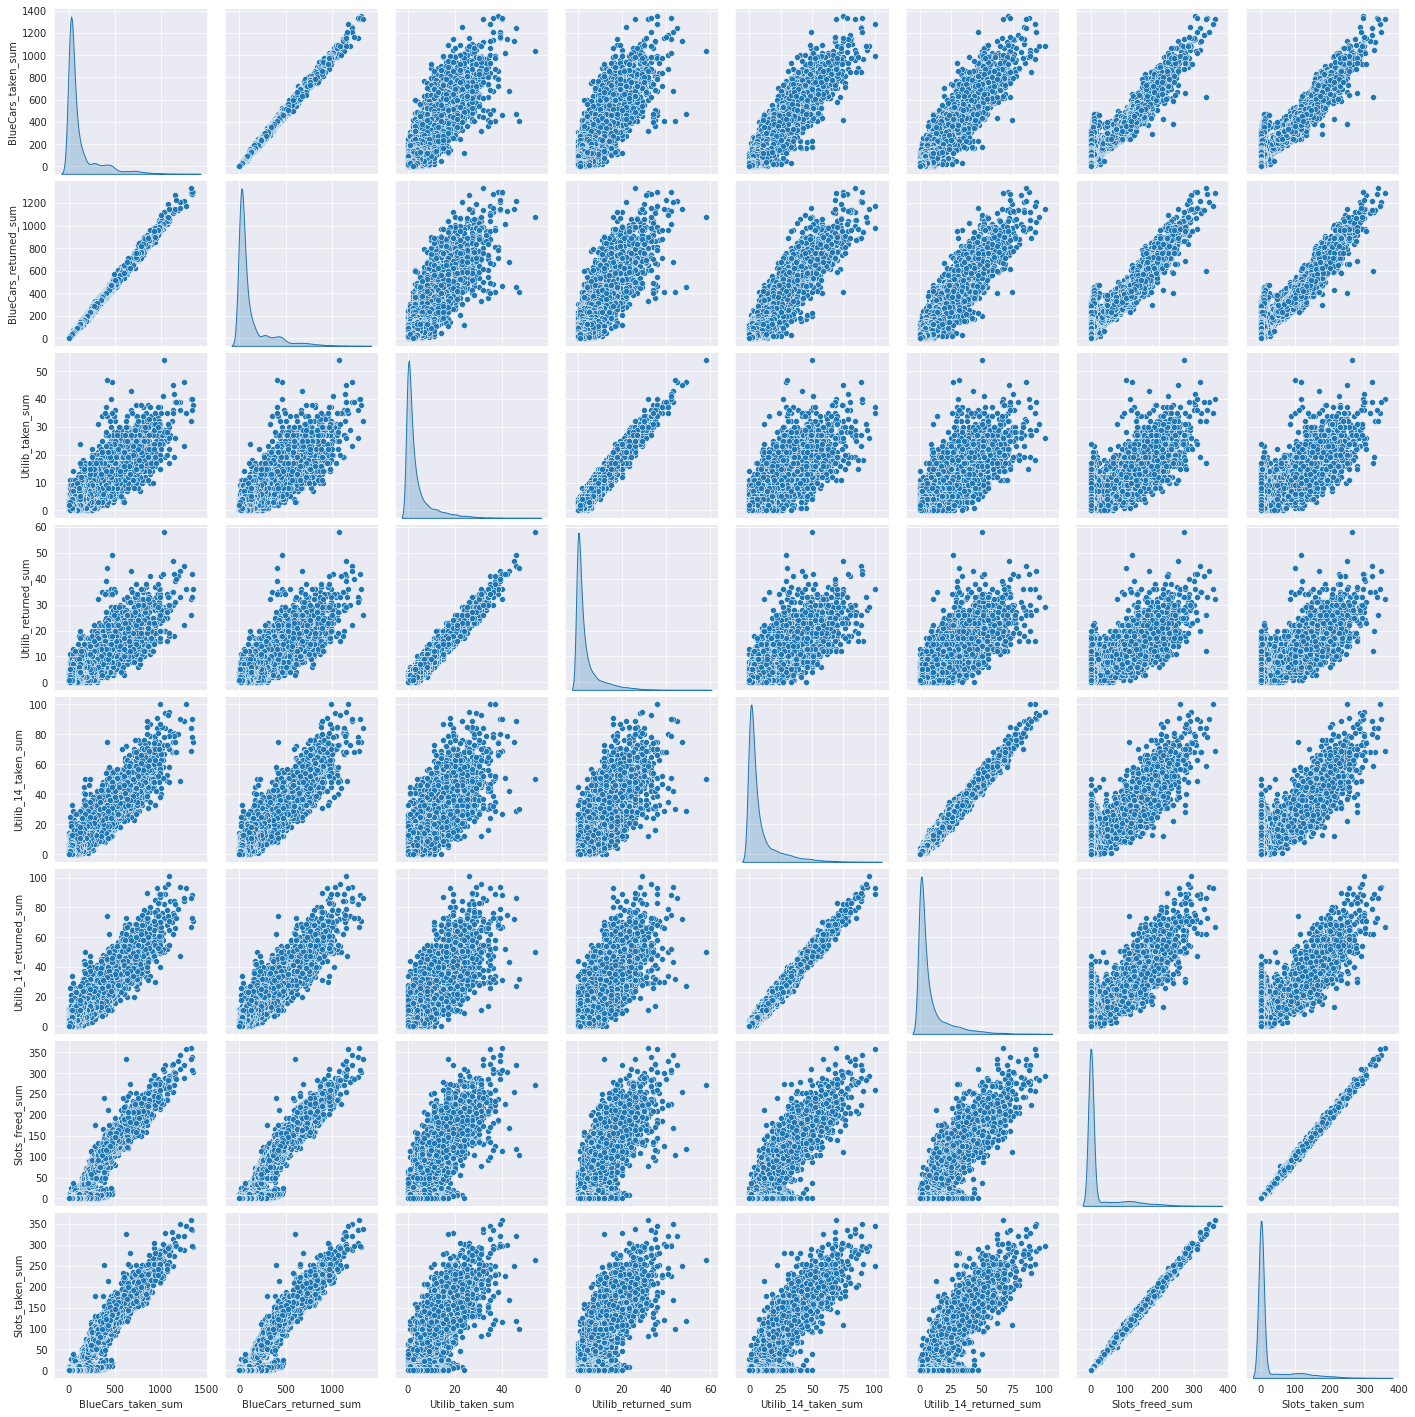

In [115]:
d = df[['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum','Utilib_returned_sum', 
        'Utilib_14_taken_sum', 'Utilib_14_returned_sum','Slots_freed_sum', 'Slots_taken_sum']]
sns.pairplot(d, diag_kind = 'kde')

## **Implementing the Solution**

> We will do this using Hypothesis Testing

The Null Hypothesis: There is no difference in the number of Bluecars taken in weekends in January in postal code 75001 and postal code 75002.

The Alternative Hypothesis: There is a difference in the number of Bluecars taken in weekends in January in postal code 75001 and postal code 75002.

We calculate our sample size and the minimum required is n=300.

In [116]:
df.columns


Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [117]:
df1=df.sample(1000)
df1

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
8186,92350,2018-03-31,1440,5,weekend,29,30,1,1,4,3,0,0
4994,92130,2018-01-06,1437,5,weekend,249,257,10,13,20,20,7,8
3742,78140,2018-06-19,1370,1,weekday,1,2,0,0,0,0,0,0
8737,92390,2018-01-17,1440,2,weekday,9,10,0,1,1,1,0,0
13023,94000,2018-03-01,1389,3,weekday,87,97,4,7,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14944,94410,2018-04-20,1417,4,weekday,22,28,0,0,1,0,0,0
11426,93310,2018-04-05,1440,3,weekday,12,16,0,0,0,0,0,0
11508,93350,2018-01-18,1439,3,weekday,13,15,0,0,0,0,0,1
8461,92370,2018-02-22,1440,3,weekday,22,23,0,0,1,1,0,0


In [118]:
# getting the day type
df2 = df1[df1.day_type == 'weekday']
df2

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3742,78140,2018-06-19,1370,1,weekday,1,2,0,0,0,0,0,0
8737,92390,2018-01-17,1440,2,weekday,9,10,0,1,1,1,0,0
13023,94000,2018-03-01,1389,3,weekday,87,97,4,7,4,3,0,0
12311,93440,2018-05-07,1437,0,weekday,4,3,0,0,0,0,0,0
13809,94140,2018-03-08,1439,3,weekday,38,47,0,1,1,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14944,94410,2018-04-20,1417,4,weekday,22,28,0,0,1,0,0,0
11426,93310,2018-04-05,1440,3,weekday,12,16,0,0,0,0,0,0
11508,93350,2018-01-18,1439,3,weekday,13,15,0,0,0,0,0,1
8461,92370,2018-02-22,1440,3,weekday,22,23,0,0,1,1,0,0


In [119]:
#getting the weekdays in the two postal codes, i.e, 75001 and 75002
dfp=df2[df['Postal code'].isin([75001,75002])]
dfp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
202,75002,2018-02-16,1439,4,weekday,146,146,6,6,6,6,45,44
119,75001,2018-05-03,1439,3,weekday,138,138,2,2,9,9,26,26
247,75002,2018-04-05,1440,3,weekday,167,167,9,9,14,14,39,37
130,75001,2018-05-25,1440,4,weekday,141,142,9,9,7,7,23,24
172,75002,2018-01-17,1440,2,weekday,163,164,4,4,10,10,43,43
77,75001,2018-03-22,1440,3,weekday,143,142,9,9,3,3,22,24
14,75001,2018-01-15,1440,0,weekday,107,107,4,4,9,9,15,15
35,75001,2018-02-05,1440,0,weekday,121,121,2,2,7,7,17,18
246,75002,2018-04-04,1440,2,weekday,152,151,7,7,19,19,35,35
151,75001,2018-06-15,1440,4,weekday,150,150,5,5,3,3,20,22


> We set the significance level at 0.05%. This means that there is a 5% chance that we will accept our alternative hypothesis when our null hypothesis is actually true. The smaller the significance level, the greater the burden of proof needed to reject the null hypothesis, or in other words, to support the alternative hypothesis. 

> We use the z-score since our sample size is greater than 30.

In [122]:
#getting the sample population mean
dfp['BlueCars_taken_sum'].mean()

141.375

In [135]:
#getting the sample population standard deviation
dfp['BlueCars_taken_sum'].std()

19.304144632694815

In [123]:
#getting the z-score
mu=125.92695057506994
stdv=185.42657876727893
x_bar=141.375
z_score=((141.375-125.92695057506994)/185.42657876727893)
print(z_score)

0.08331086906542269


In [132]:
#getting the p value
p_val=stats.norm.cdf(z_score)
print(p_val)

0.5331978209619032


The p value(0.5331978209619032) is greater than the sigficance level(alpha=0.05) thus is not statistically significant and indicates strong evidence for the null hypothesis. We therefore ***fail to reject the null hypothesis*** thus there is no difference in the number of Bluecars taken in weekends in January in postal code 75001 and postal code 75002.